In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
train_data=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.shape

(8693, 14)

In [5]:
train_data.describe

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService

In [6]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train_data.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [9]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [10]:
train_data[['CabinDeck', 'CabinNo','CabinSide']] = train_data.Cabin.str.split("/", expand = True)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNo,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [11]:
train_data['CabinDeck'].value_counts


<bound method IndexOpsMixin.value_counts of 0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: CabinDeck, Length: 8693, dtype: object>

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  CabinDeck     8494 non-null   object 
 15  CabinNo       8494 non-null   object 
 16  CabinSide     8494 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


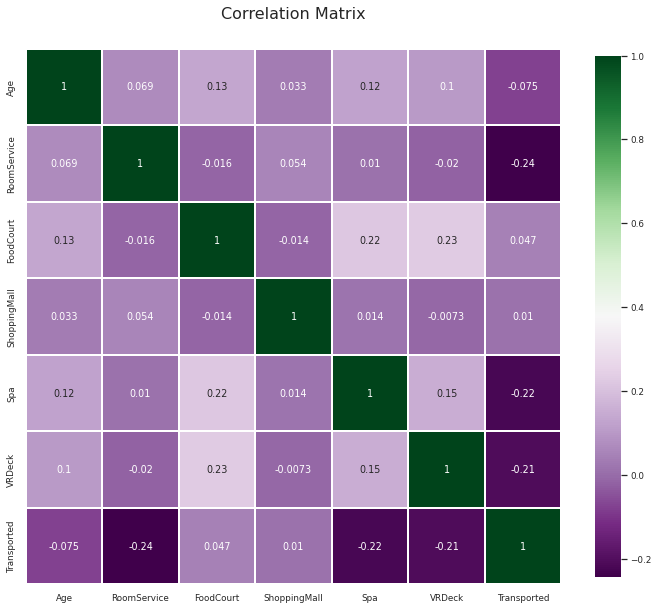

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = train_data.corr()
plt.figure(figsize=(12, 12))
sns.set(font_scale=0.8)
sns.heatmap(corr, square=True, cmap="PRGn", linewidths=2, annot=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Matrix", fontsize=16, pad=30)
plt.show()

<AxesSubplot:xlabel='VIP', ylabel='count'>

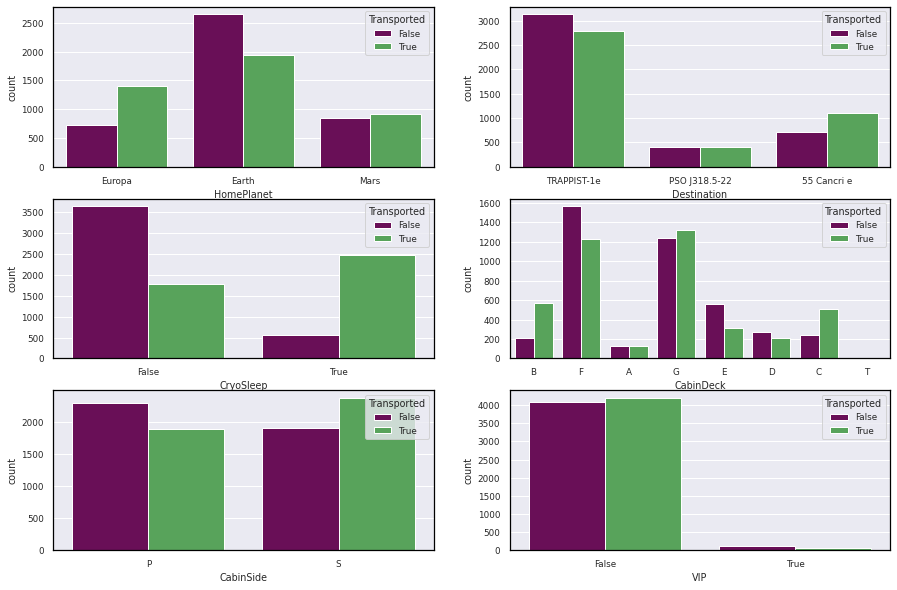

In [17]:
sns.set_style('darkgrid', {'axes.linewidth': 2, 'axes.edgecolor':'black'})
colorPal = ["#780060", "#4CAF50"]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), squeeze=False)
sns.countplot(ax=ax[0,0], x="HomePlanet", hue="Transported", data=train_data, palette=colorPal)
sns.countplot(ax=ax[0,1], x="Destination", hue="Transported", data=train_data, palette=colorPal)
sns.countplot(ax=ax[1,0], x="CryoSleep", hue="Transported", data=train_data, palette=colorPal)
sns.countplot(ax=ax[1,1], x="CabinDeck", hue="Transported", data=train_data, palette=colorPal)
sns.countplot(ax=ax[2,0], x="CabinSide", hue="Transported", data=train_data, palette=colorPal)
sns.countplot(ax=ax[2,1], x="VIP", hue="Transported", data=train_data, palette=colorPal)

In [18]:
train_data['Age'] = (train_data['Age'] - train_data['Age'].mean()) / train_data['Age'].std()
train_data['RoomService'] = (train_data['RoomService'] - train_data['RoomService'].mean()) / train_data['RoomService'].std()
train_data['FoodCourt'] = (train_data['FoodCourt'] - train_data['FoodCourt'].mean()) / train_data['FoodCourt'].std()
train_data['ShoppingMall'] = (train_data['ShoppingMall'] - train_data['ShoppingMall'].mean()) / train_data['ShoppingMall'].std()
train_data['Spa'] = (train_data['Spa'] - train_data['Spa'].mean()) / train_data['Spa'].std()
train_data['VRDeck'] = (train_data['VRDeck'] - train_data['VRDeck'].mean()) / train_data['VRDeck'].std()

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNo,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,0.702054,False,-0.337006,-0.284257,-0.287300,-0.273720,-0.266082,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,-0.333213,False,-0.173518,-0.278672,-0.245957,0.209255,-0.227678,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,2.013391,True,-0.272511,1.934808,-0.287300,5.633703,-0.223314,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,0.287947,False,-0.337006,0.511901,0.326231,2.654919,-0.097629,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,-0.885355,False,0.117460,-0.240819,-0.037588,0.223331,-0.264336,Willy Santantines,True,F,1,S


In [19]:


from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

impute_mean = SimpleImputer(strategy='median')
impute_mode = SimpleImputer(strategy='most_frequent')
 
column_trans = ColumnTransformer([('impute_homeplanet', impute_mode, [1]),
                                  ('impute_cryosleep', impute_mode, [2]),
                                  ('impute_desination', impute_mode, [4]),
                                  ('impute_age', impute_mean, [5]),
                                  ('impute_vip', impute_mode, [6]),
                                  ('impute_roomservice', impute_mean, [7]),
                                  ('impute_foodcourt', impute_mean, [8]),
                                  ('impute_shoppingmall', impute_mean, [9]),
                                  ('impute_spa', impute_mean, [10]),
                                 ('impute_vrdeck', impute_mean, [11]),
                                  ('impute_cabindeck', impute_mode, [14]),
                                 ('impute_CabinSide', impute_mode, [16])], 
                                 remainder='passthrough')
column_names = train_data.columns
train_data= column_trans.fit_transform(train_data)

train_data_imputed = pd.DataFrame(train_data)
train_data_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Europa,False,TRAPPIST-1e,0.702054,False,-0.337006,-0.284257,-0.2873,-0.27372,-0.266082,B,P,0001_01,B/0/P,Maham Ofracculy,False,0
1,Earth,False,TRAPPIST-1e,-0.333213,False,-0.173518,-0.278672,-0.245957,0.209255,-0.227678,F,S,0002_01,F/0/S,Juanna Vines,True,0
2,Europa,False,TRAPPIST-1e,2.013391,True,-0.272511,1.934808,-0.2873,5.633703,-0.223314,A,S,0003_01,A/0/S,Altark Susent,False,0
3,Europa,False,TRAPPIST-1e,0.287947,False,-0.337006,0.511901,0.326231,2.654919,-0.097629,A,S,0003_02,A/0/S,Solam Susent,False,0
4,Earth,False,TRAPPIST-1e,-0.885355,False,0.11746,-0.240819,-0.037588,0.223331,-0.264336,F,S,0004_01,F/1/S,Willy Santantines,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,0.840089,True,-0.337006,3.947233,-0.2873,1.171685,-0.201494,A,P,9276_01,A/98/P,Gravior Noxnuther,False,98
8689,Earth,True,PSO J318.5-22,-0.74732,False,-0.337006,-0.284257,-0.2873,-0.27372,-0.266082,G,S,9278_01,G/1499/S,Kurta Mondalley,False,1499
8690,Earth,False,TRAPPIST-1e,-0.195177,False,-0.337006,-0.284257,2.808468,-0.27284,-0.266082,G,S,9279_01,G/1500/S,Fayey Connon,True,1500
8691,Europa,False,55 Cancri e,0.218929,False,-0.337006,0.366694,-0.2873,0.036827,2.557477,E,S,9280_01,E/608/S,Celeon Hontichre,False,608


In [20]:
train_data_imputed.isnull().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13    199
14    200
15      0
16    199
dtype: int64

In [21]:
train_data_imputed.columns= ['HomePlanet','CryoSleep','Destination', 'Age','VIP',
        'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','CabinDeck','CabinSide','PassengerID','Cabin','Name',
       'Transported','CabinNo']
train_data_imputed.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,PassengerID,Cabin,Name,Transported,CabinNo
0,Europa,False,TRAPPIST-1e,0.702054,False,-0.337006,-0.284257,-0.2873,-0.27372,-0.266082,B,P,0001_01,B/0/P,Maham Ofracculy,False,0
1,Earth,False,TRAPPIST-1e,-0.333213,False,-0.173518,-0.278672,-0.245957,0.209255,-0.227678,F,S,0002_01,F/0/S,Juanna Vines,True,0
2,Europa,False,TRAPPIST-1e,2.013391,True,-0.272511,1.934808,-0.2873,5.633703,-0.223314,A,S,0003_01,A/0/S,Altark Susent,False,0
3,Europa,False,TRAPPIST-1e,0.287947,False,-0.337006,0.511901,0.326231,2.654919,-0.097629,A,S,0003_02,A/0/S,Solam Susent,False,0
4,Earth,False,TRAPPIST-1e,-0.885355,False,0.11746,-0.240819,-0.037588,0.223331,-0.264336,F,S,0004_01,F/1/S,Willy Santantines,True,1


In [22]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_data_imputed['Transported']= label_encoder.fit_transform(train_data_imputed['Transported'])
train_data_imputed['HomePlanet']= label_encoder.fit_transform(train_data_imputed['HomePlanet'])
train_data_imputed['Destination']= label_encoder.fit_transform(train_data_imputed['Destination'])
train_data_imputed['CryoSleep']= label_encoder.fit_transform(train_data_imputed['CryoSleep'])
train_data_imputed['VIP']= label_encoder.fit_transform(train_data_imputed['VIP'])
train_data_imputed['CabinDeck']= label_encoder.fit_transform(train_data_imputed['CabinDeck'])
train_data_imputed['CabinSide']= label_encoder.fit_transform(train_data_imputed['CabinSide'])
train_data_imputed.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,PassengerID,Cabin,Name,Transported,CabinNo
0,1,0,2,0.702054,0,-0.337006,-0.284257,-0.2873,-0.27372,-0.266082,1,0,0001_01,B/0/P,Maham Ofracculy,0,0
1,0,0,2,-0.333213,0,-0.173518,-0.278672,-0.245957,0.209255,-0.227678,5,1,0002_01,F/0/S,Juanna Vines,1,0
2,1,0,2,2.013391,1,-0.272511,1.934808,-0.2873,5.633703,-0.223314,0,1,0003_01,A/0/S,Altark Susent,0,0
3,1,0,2,0.287947,0,-0.337006,0.511901,0.326231,2.654919,-0.097629,0,1,0003_02,A/0/S,Solam Susent,0,0
4,0,0,2,-0.885355,0,0.11746,-0.240819,-0.037588,0.223331,-0.264336,5,1,0004_01,F/1/S,Willy Santantines,1,1


In [23]:
train_data_imputed['Age'] = pd.to_numeric(train_data_imputed['Age'])
train_data_imputed['RoomService'] = pd.to_numeric(train_data_imputed['RoomService'])
train_data_imputed['FoodCourt'] = pd.to_numeric(train_data_imputed['FoodCourt'])
train_data_imputed['ShoppingMall'] = pd.to_numeric(train_data_imputed['ShoppingMall'])
train_data_imputed['Spa'] = pd.to_numeric(train_data_imputed['Spa'])
train_data_imputed['VRDeck'] = pd.to_numeric(train_data_imputed['VRDeck'])

In [ ]:

train_data_imputed['Age'] = pd.to_numeric(train_data_imputed['Age'])
train_data_imputed['RoomService'] = pd.to_numeric(train_data_imputed['RoomService'])
train_data_imputed['ShoppingMall'] = pd.to_numeric(train_data_imputed['ShoppingMall'])
train_data_imputed['Spa'] = pd.to_numeric(train_data_imputed['Spa'])
train_data_imputed['VRDeck'] = pd.to_numeric(train_data_imputed['VRDeck'])
train_data_imputed['FoodCourt'] = pd.to_numeric(train_data_imputed['FoodCourt'])

In [24]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
X= train_data_imputed[['HomePlanet','CryoSleep','Destination', 'Age','VIP',
        'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','CabinDeck','CabinSide']]
y= train_data_imputed['Transported']

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.1,random_state=10)

model = RandomForestClassifier(max_depth=13)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=13)

In [25]:
print(X.dtypes)

HomePlanet        int64
CryoSleep         int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
CabinDeck         int64
CabinSide         int64
dtype: object


In [26]:
predictions=model.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(predictions,y_val))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       441
           1       0.80      0.82      0.81       429

    accuracy                           0.81       870
   macro avg       0.81      0.81      0.81       870
weighted avg       0.81      0.81      0.81       870



In [27]:
test_data=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [28]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [29]:
test_data[['CabinDeck', 'CabinNo','CabinSide']] = test_data.Cabin.str.split("/", expand = True)
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNo,CabinSide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [30]:
test_data['Age'] = (test_data['Age'] - test_data['Age'].mean()) / test_data['Age'].std()
test_data['RoomService'] = (test_data['RoomService'] - test_data['RoomService'].mean()) / test_data['RoomService'].std()
test_data['FoodCourt'] = (test_data['FoodCourt'] - test_data['FoodCourt'].mean()) / test_data['FoodCourt'].std()
test_data['ShoppingMall'] = (test_data['ShoppingMall'] - test_data['ShoppingMall'].mean()) / test_data['ShoppingMall'].std()
test_data['Spa'] = (test_data['Spa'] - test_data['Spa'].mean()) / test_data['Spa'].std()
test_data['VRDeck'] = (test_data['VRDeck'] - test_data['VRDeck'].mean()) / test_data['VRDeck'].std()

test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNo,CabinSide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,-0.116943,False,-0.361223,-0.287684,-0.316136,-0.271264,-0.249167,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,-0.681155,False,-0.361223,-0.281793,-0.316136,2.255620,-0.249167,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.165163,False,-0.361223,-0.287684,-0.316136,-0.271264,-0.249167,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.658848,False,-0.361223,4.066679,-0.316136,-0.109250,0.219961,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,-0.610629,False,-0.344749,-0.287684,0.816133,-0.271264,-0.249167,Brence Harperez,F,5,S


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

impute_mean = SimpleImputer(strategy='median')
impute_mode = SimpleImputer(strategy='most_frequent')
 
column_trans = ColumnTransformer([('impute_homeplanet', impute_mode, [1]),
                                  ('impute_cryosleep', impute_mode, [2]),
                                  ('impute_desination', impute_mode, [4]),
                                  ('impute_age', impute_mean, [5]),
                                  ('impute_vip', impute_mode, [6]),
                                  ('impute_roomservice', impute_mean, [7]),
                                  ('impute_foodcourt', impute_mean, [8]),
                                  ('impute_shoppingmall', impute_mean, [9]),
                                  ('impute_spa', impute_mean, [10]),
                                 ('impute_vrdeck', impute_mean, [11]),
                                  ('impute_cabindeck', impute_mode, [13]),
                                 ('impute_CabinSide', impute_mode, [15])], 
                                 remainder='passthrough')
column_names = test_data.columns
test_data= column_trans.fit_transform(test_data)

test_data_imputed = pd.DataFrame(test_data)
test_data_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Earth,True,TRAPPIST-1e,-0.116943,False,-0.361223,-0.287684,-0.316136,-0.271264,-0.249167,G,S,0013_01,G/3/S,Nelly Carsoning,3
1,Earth,False,TRAPPIST-1e,-0.681155,False,-0.361223,-0.281793,-0.316136,2.25562,-0.249167,F,S,0018_01,F/4/S,Lerome Peckers,4
2,Europa,True,55 Cancri e,0.165163,False,-0.361223,-0.287684,-0.316136,-0.271264,-0.249167,C,S,0019_01,C/0/S,Sabih Unhearfus,0
3,Europa,False,TRAPPIST-1e,0.658848,False,-0.361223,4.066679,-0.316136,-0.10925,0.219961,C,S,0021_01,C/1/S,Meratz Caltilter,1
4,Earth,False,TRAPPIST-1e,-0.610629,False,-0.344749,-0.287684,0.816133,-0.271264,-0.249167,F,S,0023_01,F/5/S,Brence Harperez,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,0.376742,False,-0.361223,-0.287684,-0.316136,-0.271264,-0.249167,G,S,9266_02,G/1496/S,Jeron Peter,1496
4273,Earth,False,TRAPPIST-1e,0.940954,False,-0.361223,0.266758,-0.285823,-0.262313,-0.133689,F,S,9269_01,NaN,Matty Scheron,NaN
4274,Mars,True,55 Cancri e,-0.18747,False,-0.361223,-0.287684,-0.316136,-0.271264,-0.249167,D,P,9271_01,D/296/P,Jayrin Pore,296
4275,Europa,False,TRAPPIST-1e,-0.18747,False,-0.361223,1.46663,-0.316136,-0.271264,0.170241,D,P,9273_01,D/297/P,Kitakan Conale,297


In [32]:
test_data_imputed.isnull().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13    100
14     94
15    100
dtype: int64

In [33]:
test_data_imputed.columns= ['HomePlanet','CryoSleep','Destination', 'Age','VIP',
        'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','CabinDeck','CabinSide','PassengerID','Cabin','Name',
       'CabinNo']
test_data_imputed.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,PassengerID,Cabin,Name,CabinNo
0,Earth,True,TRAPPIST-1e,-0.116943,False,-0.361223,-0.287684,-0.316136,-0.271264,-0.249167,G,S,0013_01,G/3/S,Nelly Carsoning,3
1,Earth,False,TRAPPIST-1e,-0.681155,False,-0.361223,-0.281793,-0.316136,2.25562,-0.249167,F,S,0018_01,F/4/S,Lerome Peckers,4
2,Europa,True,55 Cancri e,0.165163,False,-0.361223,-0.287684,-0.316136,-0.271264,-0.249167,C,S,0019_01,C/0/S,Sabih Unhearfus,0
3,Europa,False,TRAPPIST-1e,0.658848,False,-0.361223,4.066679,-0.316136,-0.10925,0.219961,C,S,0021_01,C/1/S,Meratz Caltilter,1
4,Earth,False,TRAPPIST-1e,-0.610629,False,-0.344749,-0.287684,0.816133,-0.271264,-0.249167,F,S,0023_01,F/5/S,Brence Harperez,5


In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_data_imputed['HomePlanet']= label_encoder.fit_transform(test_data_imputed['HomePlanet'])
test_data_imputed['Destination']= label_encoder.fit_transform(test_data_imputed['Destination'])
test_data_imputed['CryoSleep']= label_encoder.fit_transform(test_data_imputed['CryoSleep'])
test_data_imputed['VIP']= label_encoder.fit_transform(test_data_imputed['VIP'])
test_data_imputed['CabinDeck']= label_encoder.fit_transform(test_data_imputed['CabinDeck'])
test_data_imputed['CabinSide']= label_encoder.fit_transform(test_data_imputed['CabinSide'])

In [35]:
test_data_imputed['Age'] = pd.to_numeric(test_data_imputed['Age'])
test_data_imputed['RoomService'] = pd.to_numeric(test_data_imputed['RoomService'])
test_data_imputed['FoodCourt'] = pd.to_numeric(test_data_imputed['FoodCourt'])
test_data_imputed['ShoppingMall'] = pd.to_numeric(test_data_imputed['ShoppingMall'])
test_data_imputed['Spa'] = pd.to_numeric(test_data_imputed['Spa'])
test_data_imputed['VRDeck'] = pd.to_numeric(test_data_imputed['VRDeck'])

In [36]:
predictions= model.predict(test_data_imputed[['HomePlanet','CryoSleep','Destination', 'Age','VIP',
        'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','CabinDeck','CabinSide']])  
print(predictions)


[1 0 1 ... 1 1 0]


In [37]:
sample_submission= pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [38]:
my_submission = pd.DataFrame({'PassengerId': test_data_imputed['PassengerID'], 'Transported': predictions})
my_submission.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [39]:
my_submission['Transported'].value_counts()

0    2441
1    1836
Name: Transported, dtype: int64

In [40]:
cleanup_nums = {"Transported":     {1: "True", 0: "False"}}
my_submission=my_submission.replace(cleanup_nums)
my_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
my_submission.to_csv('submission7.csv', index=False)